# Support Vector Machines 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

In [2]:
df = sns.load_dataset("iris")

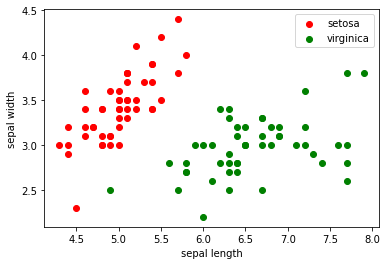

In [3]:
df1 = df[df.species=="setosa"]
#df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.scatter(df1.sepal_length, df1.sepal_width, color="red", label ="setosa")
#plt.scatter(df2.sepal_length, df2.sepal_width, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.sepal_width, color="green", label="virginica")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend();

In [4]:
df_sv = pd.concat([df1, df3])
df_sv

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X = df_sv[["sepal_length", "sepal_width"]]
y = df_sv["species"]

In [6]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [9]:
model = SVC(kernel="linear", C=1000)
model.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [10]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

1.0

In [11]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

1.0

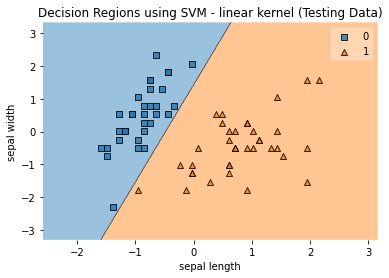

In [12]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Testing Data)');

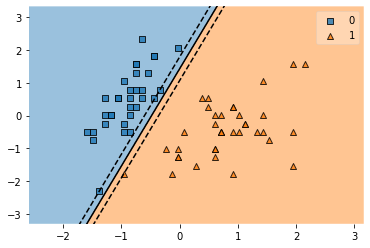

In [13]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [14]:
model.support_vectors_

array([[-0.33596747,  0.78719042],
       [-1.37657467, -2.30271591],
       [-0.96033179, -1.78773152]])

In [15]:
model = SVC(kernel="linear", C=10)
model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [16]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9857142857142858

In [17]:
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

1.0

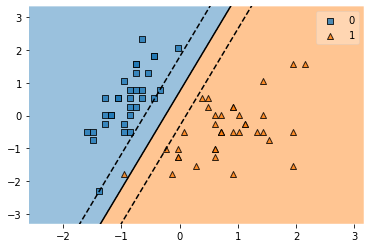

In [18]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

In [20]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [21]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7904761904761904

In [26]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7333333333333333

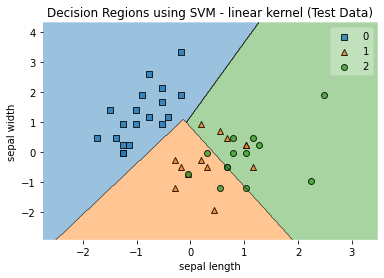

In [30]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - linear kernel (Test Data)');

In [31]:
model = SVC(kernel="poly", degree=3)
model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [32]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7714285714285715

In [33]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7555555555555555

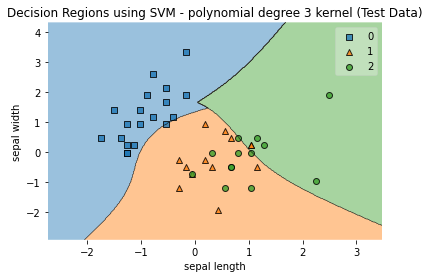

In [34]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - polynomial degree 3 kernel (Test Data)');

In [35]:
model = SVC(kernel="rbf", gamma=0.1)
model.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

In [36]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.7904761904761904

In [37]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7333333333333333

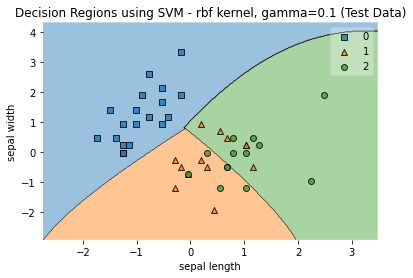

In [38]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=0.1 (Test Data)');

In [39]:
model = SVC(kernel="rbf", gamma=100)
model.fit(X_train_scaled, y_train)

SVC(gamma=100)

In [40]:
y_pred = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9619047619047619

In [41]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5555555555555556

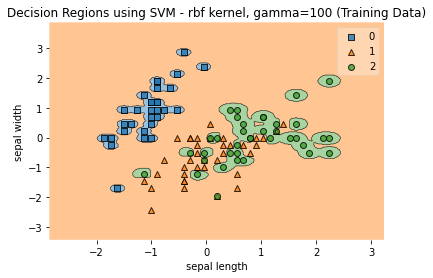

In [42]:
plot_decision_regions(X_train_scaled, y_train, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Training Data)');

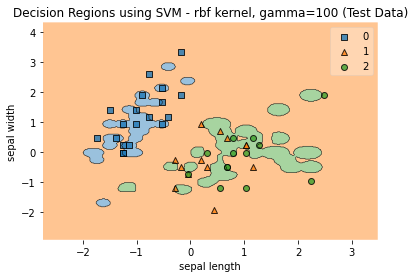

In [43]:
plot_decision_regions(X_test_scaled, y_test, clf = model)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Decision Regions using SVM - rbf kernel, gamma=100 (Test Data)');